In [2]:
def genuid (i):
    uid = []
    for j in range(3) :
        uid.append(chr(random.randint(65,90)))
    uid.append(str(i))
    for j in range(10-len(uid)) :
        uid.append(str(random.randint(0,9)))
    return "".join(uid)

In [30]:
def generate_data(N) :
    import csv
    import random
    f = open('Database.csv','w')
    csvout = csv.writer(f)
    data = []
    fields = ["Agent ID", "Net monthly income", "Initial Reserve",'Shock Rate', "Mean Shock Size distribution", "Ruin Probability"]
    csvout.writerow(fields)
    for i in range(N) :
        c = random.randint(1,1000)
        u = random.randint(0,1000)
        if u == 0 :
            μ = random.random()*c
            β = (random.random()*c/μ)
            Ψ = β*μ/c
        else :
            μ = random.random()*u
            β = random.random()*(u*c)/μ
            Ψ = (β*μ)/(u*c)
        data.append([genuid(i),c,u,β,μ,Ψ])
    csvout.writerows(data)
    f.close()

In [79]:
def sort_data(basis) :
    import pandas as pd
    f = open('Database.csv','r')
    data = pd.read_csv(f)
    sorteddata = data.sort_values(by=[basis],ascending=False)
    f.close()
    sorteddata.index = data.index
    return sorteddata.values.tolist()

In [160]:
def subsidy (goal,current=0) :
    global sorteddata,xi
    xi = []
    sdc = sorteddata[current]
    sdg = sorteddata[goal]
    while current < goal and (sdg[-1]-sdc[-1]) < 0:
        sdc = sorteddata[current]
        if sorteddata[current][2] == 0 :
            xi.append((sdc[3]*sdc[4]/sdg[-1]) - sdc[1])
        else :
            xi.append(((sdc[3]*sdc[4])/(sdg[-1]*sdc[2])) - sdc[1])
        current+=1
    return sum(xi)

In [240]:
def HowManyBenefit(n, target):
	global xi
	# Corner cases
	if (target <= subsidy(1)):
		return 0
	if target >= subsidy(n - 1):
		return (n - 1)

	# Doing binary search
	i = 0; j = n; mid = 0
	while (i < j):
		mid = (i + j) // 2
		sm = subsidy(mid)
		tempsub = xi

		if (sm == target):
			return mid

		# If target is less than total subsidy
		# then search in left
		if (target < sm) :

			# If target is greater than previous
			# to mid, return lesser of two
			if (mid > 0 and target > subsidy(mid - 1)):
				return mid-1

			# Repeat for left half
			j = mid
		
		# If target is greater than mid
		else :
			
			if (mid < n - 1 and target < subsidy(mid + 1)):
				xi = tempsub
				return mid
				
			# update i
			i = mid + 1

	return mid

In [266]:
def viewresults() :
    global xi, sorteddata
    import matplotlib.pyplot as plt
    plt.style.use("dark_background")
    plt.scatter(range(N),[sorteddata[i][-1] for i in range(N)],color='r')
    plt.ylabel("Ruin probability")
    plt.xlabel("Agent number")
    plt.title("RP before allocation")
    plt.show()
    rp = []
    for i in range(len(xi)) :
        sd = sorteddata[i]
        if sd[2] == 0 :
            rp.append((sd[3]*sd[4])/(sd[1]+xi[i]))
        else :
            rp.append((sd[3]*sd[4])/(sd[2]*(sd[1]+xi[i])))
    for i in range(len(xi),len(sorteddata),1) :
        rp.append(sorteddata[i][-1])
    plt.ylim(0,1)
    plt.scatter(range(N),rp,color='r')
    plt.scatter(len(xi)-1,sd[-1],color='g')
    plt.ylabel("Ruin probability")
    plt.xlabel("Agent number")
    plt.title("RP after allocation")
    plt.show()

### What is the Budget required to help p agents

In [268]:
p = 5000
print(f"We need a budget of {subsidy(p)} units to help {p} agents")

We need a budget of 1237227.416647224 units to help 5000 agents


### How many agents can we help with given Budget

In [3]:
N = 10000
Budget = 50000
print(f"With a budget of {Budget} units we can help {Pegasus.HowManyBenefit(N,Budget)} agents")

With a budget of 50000 units we can help 1304 agents


### View Results

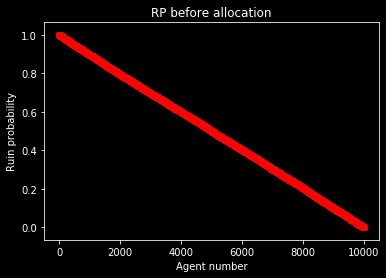

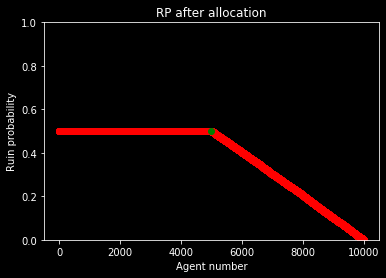

In [269]:
viewresults()

In [1]:
import Pegasus
filename = 'Database.csv'
Pegasus.sort_data(filename,'Ruin Probability')
p = 1000
Pegasus.subsidy(p)

True


29539.032373339945

In [4]:
k = 4
def juju (n) :
    k = n
    print(k)
def hulu () :
    print(k)
juju(1)
hulu()

1
4


In [3]:
global m
m

NameError: name 'm' is not defined